#### Imports

In [1]:
from sklearn.tree import DecisionTreeClassifier
import evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt
from statistics import mean

#### Retrieve Stored Variables
Standard dataset

In [2]:
%store -r data

#### Variable That Removes Class Variable and ID from Dataset

In [3]:
clean = list(set(list(data)) - set(['default_payment_next_month', 'id']))

#### Seperate Dataset into Training and Testing Subsets
70/30 split will be used

In [4]:
std_x_train, std_x_test, std_y_train, std_y_test = train_test_split(data[clean], 
                                                                    data['default_payment_next_month'], 
                                                                    test_size=0.3, 
                                                                    random_state=14)

#### Instantiate Decision Tree Model Object

In [5]:
model = DecisionTreeClassifier()

#### Train the Model on the Training Data and Use it to Predict Y Values of Test Set
Include the time taken

In [6]:
start = time.time()
model.fit(X = std_x_train,
          y = std_y_train)
results = confusion_matrix(y_pred = model.predict(std_x_test),
                           y_true = std_y_test)
end = time.time()
print(f'The model took {round(end - start, 2)} seconds to train and predict.')

The model took 0.62 seconds to train and predict.


#### Display Confusion Matrix

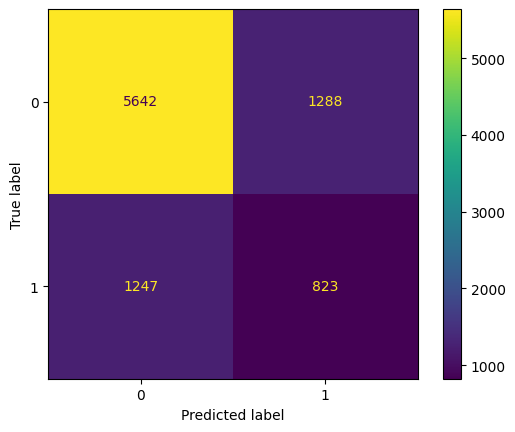

In [7]:
ConfusionMatrixDisplay(results).plot()

#### Evaluate the Model Using Custom Eval Metrics Class

In [8]:
metrics = evaluation.evalMetrics(results)

In [9]:
print(f'The Accuracy of the Model: {round(metrics.accuracy(),3)}')
print(f'The Precision of the Model: {round(metrics.precision(),2)}')
print(f'The Recall of the Model: {round(metrics.recall(),2)}')
print(f'The F-Score of the Model: {round(metrics.fScore(),2)}')
print(f'The Negative Predictive Value  of the Model: {round(metrics.negativePredictiveValue(),2)}')
print(f'The Positive Predicitive Value of the Model: {round(metrics.positivePredictiveValue(),2)}')

The Accuracy of the Model: 0.718
The Precision of the Model: 0.82
The Recall of the Model: 0.81
The F-Score of the Model: 0.82
The Negative Predictive Value  of the Model: 0.39
The Positive Predicitive Value of the Model: 0.82


#### Cross Validate the Model Using Accuracy

In [10]:
start = time.time()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=28)
cv_scores = cross_val_score(model, data[clean], data['default_payment_next_month'], scoring='accuracy', cv=cv)
end = time.time()

#### CV Scores, Min and Max

In [11]:
print(cv_scores)
print()
print('Max Cross Validation Score: ', max(cv_scores))
print('Min Cross Validation Score: ', min(cv_scores))

[0.73466667 0.732      0.72766667 0.72433333 0.727      0.71533333
 0.73533333 0.72566667 0.711      0.72533333 0.73233333 0.72166667
 0.73366667 0.72766667 0.726      0.72633333 0.72733333 0.718
 0.72766667 0.73133333 0.718      0.715      0.721      0.72566667
 0.72533333 0.73266667 0.728      0.72433333 0.719      0.741     ]

Max Cross Validation Score:  0.741
Min Cross Validation Score:  0.711


#### Evaluate the Results of the Cross-Validation

In [12]:
print(f'Cross Validation took {round(end - start, 2)} seconds and produced an average accuracy of {round(mean(cv_scores),3)}')

Cross Validation took 30.11 seconds and produced an average accuracy of 0.726


#### Analyze Feature Importances and Select the 7 Most Meaningful
Create dict of feature values and their associated label

In [13]:
features = {}
for i in range(len(model.feature_importances_)):
    features[model.feature_importances_[i]] = model.feature_names_in_[i]

Select the 5 best features and return the labels as a list

In [14]:
selected_features = {k: v for k,v in features.items() if k in sorted(features.keys())[::-1][:7]}
selected_features = list(selected_features.values())
selected_features

['bill_amt1', 'age', 'bill_amt6', 'pay_amt6', 'limit_bal', 'pay_amt3', 'pay_0']

#### Retrain Model on Selected Features and Evaluate Change in Performance

In [15]:
features_x_train, features_x_test, features_y_train, features_y_test = train_test_split(data[selected_features], 
                                                                    data['default_payment_next_month'], 
                                                                    test_size=0.3, 
                                                                    random_state=14)

#### Reinstantiate Model and Fit/Predict

In [16]:
model = DecisionTreeClassifier()

In [17]:
start = time.time()
model.fit(X = features_x_train,
          y = features_y_train)
results = confusion_matrix(y_pred = model.predict(features_x_test),
                           y_true = features_y_test)
end = time.time()
print(f'The model took {round(end - start, 2)} seconds to train and predict.')

The model took 0.25 seconds to train and predict.


#### Display CF

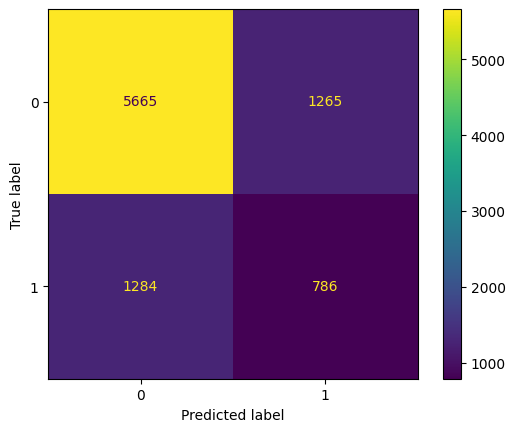

In [18]:
ConfusionMatrixDisplay(results).plot()

#### Evaluate and Cross-Validate

In [19]:
metrics = evaluation.evalMetrics(results)
print(f'The Accuracy of the Model: {round(metrics.accuracy(),3)}')
print(f'The Precision of the Model: {round(metrics.precision(),2)}')
print(f'The Recall of the Model: {round(metrics.recall(),2)}')
print(f'The F-Score of the Model: {round(metrics.fScore(),2)}')
print(f'The Negative Predictive Value  of the Model: {round(metrics.negativePredictiveValue(),2)}')
print(f'The Positive Predicitive Value of the Model: {round(metrics.positivePredictiveValue(),2)}')

The Accuracy of the Model: 0.717
The Precision of the Model: 0.82
The Recall of the Model: 0.82
The F-Score of the Model: 0.82
The Negative Predictive Value  of the Model: 0.38
The Positive Predicitive Value of the Model: 0.82


In [20]:
start = time.time()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=28)
cv_scores = cross_val_score(model, data[selected_features], data['default_payment_next_month'], scoring='accuracy', cv=cv)
end = time.time()
print(f'Cross Validation took {round(end - start, 2)} seconds and produced an average accuracy of {round(mean(cv_scores),3)}')

Cross Validation took 10.97 seconds and produced an average accuracy of 0.724


#### CV Scores, Min and Max

In [21]:
print(cv_scores)
print()
print('Max Cross Validation Score: ', max(cv_scores))
print('Min Cross Validation Score: ', min(cv_scores))

[0.723      0.73766667 0.70966667 0.72233333 0.73166667 0.711
 0.721      0.731      0.736      0.725      0.72166667 0.729
 0.74133333 0.723      0.72266667 0.72166667 0.715      0.72466667
 0.73       0.71933333 0.72       0.708      0.71933333 0.729
 0.73633333 0.73166667 0.72366667 0.72066667 0.71766667 0.726     ]

Max Cross Validation Score:  0.7413333333333333
Min Cross Validation Score:  0.708
